In [1]:
from datetime import date, timedelta
import pandas as pd
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
# get name of the data from today
csv_today = "data_" + str(date.today()) + ".csv"

yesterday = date.today() - timedelta(days=1)
csv_yesterday = "data_" + str(yesterday) + ".csv"
df = pd.read_csv(csv_today)

In [3]:
# reads all data from directory
def read_all_data():
    pass


In [4]:
df.head()

,features,price,prodajalec,title,url
0,", Starost: ...",32.570 €,"AVTO TRIGLAV d.o.o., Ljubljana, ...",Abarth 595,https://www.avto.net/Ads/details.asp?id=164709...
1,", Starost: ...",11.970 €,Tina ...,Abarth -,https://www.avto.net/Ads/details.asp?id=161705...
2,", Starost: ...",2.299 €,MINI CAR MATJAŽ LESKOVAR s.p. ...,Aixam -,https://www.avto.net/Ads/details.asp?id=164685...
3,", Starost: ...",9.800 €,Jan ...,Abarth -,https://www.avto.net/Ads/details.asp?id=162463...
4,", Starost: ...",57.900 €,TELEFON: ...,Alpine A110,https://www.avto.net/Ads/details.asp?id=156864...


In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14085 entries, 0 to 14084
Data columns (total 5 columns):
features      14083 non-null object
price         12169 non-null object
prodajalec    14083 non-null object
title         14085 non-null object
url           14085 non-null object
dtypes: object(5)
memory usage: 550.3+ KB


# Data Cleaning

In [603]:
# drop entries without price info
df = df[df['price'].notnull()]

In [604]:
df = df.reset_index()

In [605]:
# much unstructued data that needs to be sorted
df['features'][22]

'                            ,      Starost:              novo      ,    Prevoženi km:                   ,      Motor:              49 kW             (67 KM),  999  ccm      ,      Gorivo:              bencinski motor      ,      Menjalnik:              ročni menjalnik (5 pr.)      ,      Oblika:              kombilimuzina / hatchback      ,      Št.vrat:              5 vr.      ,      Barva:              bela      ,      Notranjost:              temno siva / blago      ,      Interna številka:                    ,      Kraj ogleda:              ,       ,                            ,            Kombinirana vožnja:                        5 litrov / 100 km                                    ,            Izvenmestna vožnja:                        ni podatka                                ,            Mestna vožnja:                        ni podatka                                ,            Emisijski razred:                        Euro 6d                    ,            Emisija CO

In [607]:
df['title'] 

0                                             AEV - 
1                                          Abarth - 
2        Abarth 595  \r\n        276,00 \r\n        
3                                        Abarth 595 
4        Abarth 595  \r\n        250,00 \r\n        
                            ...                     
12164                                    Tata Xenon 
12165                                   Tata Indigo 
12166                                      Talbot - 
12167                                  Toyota Prius 
12168                          Toyota Corolla Verso 
Name: title, Length: 12169, dtype: object

In [608]:
# meaty function which extracts relevant values into new columns
def seperate_values():
    df_new = pd.DataFrame()
    reg = []
    letnik = []
    Starost = []
    tehnicni = []
    km = []
    Gorivo = []
    Motor = []
    Menjalnik = []
    Oblika = []
    Barva = []
    Notranjost =[]
    Kraj_ogleda = []
    Kombinirana_vožnja = []
    Izvenmestna_vožnja = []
    Mestna_vožnja = []
    Emisijski_razred = []
    Emisija_CO2 = []
    
    for i in range(len(df["features"])):
        string = df['features'][i]
        if type(string) is str:
            result = [x.strip() for x in string.split(',')]
            res = [i for i in result if 'registracija' in i] 
            reg.append(res)
            let = [i for i in result if 'Leto proizvodnje' in i]
            letnik.append(let)
            star = [i for i in result if 'Starost:' in i]
            Starost.append(star)        
            teh = [i for i in result if 'Tehnični pregled' in i]
            tehnicni.append(teh)
            kilo = [i for i in result if 'Prevoženi' in i]
            km.append(kilo) 
            gor = [i for i in result if 'Gorivo' in i]
            Gorivo.append(gor)
            mot = [i for i in result if 'Motor' in i]
            Motor.append(mot)
            men = [i for i in result if 'Menjalnik' in i]
            Menjalnik.append(men) 
            obl = [i for i in result if 'Oblika' in i]
            Oblika.append(obl) 
            barv = [i for i in result if 'Barva' in i]
            Barva.append(barv) 
            notr = [i for i in result if 'Notranjost' in i]
            Notranjost.append(notr) 
            kraj = [i for i in result if 'Kraj ogleda' in i]
            Kraj_ogleda.append(kraj) 
            komb = [i for i in result if 'Kombinirana vožnja' in i]
            Kombinirana_vožnja.append(komb) 
            izven = [i for i in result if 'Izvenmestna vožnja' in i]
            Izvenmestna_vožnja.append(izven) 
            mest = [i for i in result if 'Mestna vožnja' in i]
            Mestna_vožnja.append(mest) 
            emij = [i for i in result if 'Emisijski razred' in i]
            Emisijski_razred.append(emij) 
            co2 = [i for i in result if 'Emisija CO2' in i]
            Emisija_CO2.append(co2)
        else:
            pass
    df_new['reg'] = reg
    df_new['letnik'] = letnik
    df_new['Starost'] = Starost
    df_new['tehnicni'] = tehnicni
    df_new['prevozeni_km'] = km
    df_new['Gorivo'] = Gorivo
    df_new['Motor'] = Motor
    df_new['Menjalnik'] = Menjalnik
    df_new['Oblika'] = Oblika
    df_new['Barva'] = Barva
    df_new['Notranjost'] = Notranjost
    df_new['Kraj_ogleda'] = Kraj_ogleda
    df_new['Kombinirana_vožnja'] = Kombinirana_vožnja
    df_new['Izvenmestna_vožnja'] = Izvenmestna_vožnja
    df_new['Mestna_vožnja'] = Mestna_vožnja
    df_new['Emisijski_razred'] = Emisijski_razred
    df_new['Emisija_CO2'] = Emisija_CO2
    return df_new
                

In [609]:
df_temp = seperate_values()

In [610]:
df_temp.head()

,reg,letnik,Starost,tehnicni,prevozeni_km,Gorivo,Motor,Menjalnik,Oblika,Barva,Notranjost,Kraj_ogleda,Kombinirana_vožnja,Izvenmestna_vožnja,Mestna_vožnja,Emisijski_razred,Emisija_CO2
0,[Prva registracija: 2014 / 4],[Leto proizvodnje: 2014],[Starost: rabljeno],[],[Prevoženi km: 2650],[Gorivo: elektro pogon],[Motor: 6 kW],[Menjalnik: avtomatski menjalnik],[Oblika: kombilimuzina / hatchback],[Barva: rdeča],"[Notranjost: svetlo siva / blago,...",[Kraj ogleda: 1294 Višnja Gora],[],[],[],[],[]
1,[Prva registracija: 2014 / 7],[Leto proizvodnje: 2010],[Starost: rabljeno],[Tehnični pregled: 2022 / 1],[Prevoženi km: 157316],[Gorivo: bencinski motor],[Motor: 120 kW (163 KM)],[Menjalnik: ročni menjalnik (6 p...,[Oblika: kombilimuzina / hatchback],[Barva: črna metalik],"[Notranjost: črna / blago, Notra...",[Kraj ogleda: 2370 Dravograd],[],[],[],[],[]
2,[],[],[Starost: novo],[],[Prevoženi km:],[Gorivo: bencinski motor],[Motor: 118 kW (160 KM)],[Menjalnik: ročni menjalnik (5 p...,[Oblika: kombilimuzina / hatchback],[Barva: temno siva metalik],"[Notranjost: črna / blago, Notra...",[],[],[],[],[],[]
3,[Prva registracija: 2015 / 3],[Leto proizvodnje: 2015],[Starost: rabljeno],[],[Prevoženi km: 70000],[Gorivo: bencinski motor],[Motor: 118 kW (160 KM)],[Menjalnik: avtomatski menjalnik],[Oblika: cabriolet],[Barva: črna metalik],"[Notranjost: rjava / alcantara, N...",[Kraj ogleda:],[],[],[],[],[]
4,[],[],[Starost: novo],[],[Prevoženi km:],[Gorivo: bencinski motor],[Motor: 107 kW (145 KM)],[Menjalnik: ročni menjalnik (5 p...,[Oblika: kombilimuzina / hatchback],[Barva: rumena],"[Notranjost: črna / blago, Notra...",[],[],[],[],[],[]


In [611]:
# the function converts the lists to a string
def convert_list_to_str(df):
    
    new_df = pd.DataFrame()

    for colname, col in df.iteritems():
        if colname == 'model':
            new_df[colname] = df[colname]
            
        else:
            new_df[colname] = df[colname].apply(', '.join).astype('str')

    return new_df

In [612]:
df_temp = convert_list_to_str(df_temp)

In [613]:
df_temp.head()

,reg,letnik,Starost,tehnicni,prevozeni_km,Gorivo,Motor,Menjalnik,Oblika,Barva,Notranjost,Kraj_ogleda,Kombinirana_vožnja,Izvenmestna_vožnja,Mestna_vožnja,Emisijski_razred,Emisija_CO2
0,Prva registracija: 2014 / 4,Leto proizvodnje: 2014,Starost: rabljeno,,Prevoženi km: 2650,Gorivo: elektro pogon,Motor: 6 kW,Menjalnik: avtomatski menjalnik,Oblika: kombilimuzina / hatchback,Barva: rdeča,"Notranjost: svetlo siva / blago, ...",Kraj ogleda: 1294 Višnja Gora,,,,,
1,Prva registracija: 2014 / 7,Leto proizvodnje: 2010,Starost: rabljeno,Tehnični pregled: 2022 / 1,Prevoženi km: 157316,Gorivo: bencinski motor,Motor: 120 kW (163 KM),Menjalnik: ročni menjalnik (6 pr.),Oblika: kombilimuzina / hatchback,Barva: črna metalik,"Notranjost: črna / blago, Notran...",Kraj ogleda: 2370 Dravograd,,,,,
2,,,Starost: novo,,Prevoženi km:,Gorivo: bencinski motor,Motor: 118 kW (160 KM),Menjalnik: ročni menjalnik (5 pr.),Oblika: kombilimuzina / hatchback,Barva: temno siva metalik,"Notranjost: črna / blago, Notran...",,,,,,
3,Prva registracija: 2015 / 3,Leto proizvodnje: 2015,Starost: rabljeno,,Prevoženi km: 70000,Gorivo: bencinski motor,Motor: 118 kW (160 KM),Menjalnik: avtomatski menjalnik,Oblika: cabriolet,Barva: črna metalik,"Notranjost: rjava / alcantara, No...",Kraj ogleda:,,,,,
4,,,Starost: novo,,Prevoženi km:,Gorivo: bencinski motor,Motor: 107 kW (145 KM),Menjalnik: ročni menjalnik (5 pr.),Oblika: kombilimuzina / hatchback,Barva: rumena,"Notranjost: črna / blago, Notran...",,,,,,


In [617]:
#further cleaning of values
def clean_values(new_df):
    try:
        new_df['reg'] = new_df['reg'].str.lstrip("Prva registracija:")
        new_df['letnik'] = new_df['letnik'].str.lstrip("Leto proizvodnje:")
        new_df['Starost'] = new_df['Starost'].str.lstrip("Starost:")
        new_df['tehnicni'] = new_df['tehnicni'].str.lstrip("Tehnični pregled:")
        new_df['prevozeni_km'] = new_df['prevozeni_km'].str.lstrip("Prevoženi km:")
        new_df['Gorivo'] = new_df['Gorivo'].str.lstrip("Gorivo:")
        new_df['Motor'] = new_df['Motor'].str.lstrip("Motor: ")
        new_df['Motor'] = new_df['Motor'].str.rstrip("ccm")
        new_df['Menjalnik'] = new_df['Menjalnik'].str.lstrip("Menjalnik:")
        new_df['Oblika'] = new_df['Oblika'].str.lstrip("Oblika:")
        new_df['Barva'] = new_df['Barva'].str.lstrip("Barva:")
        new_df['Notranjost'] = new_df['Notranjost'].str.rstrip("Notranjost:")
        new_df['Kraj_ogleda'] = new_df['Kraj_ogleda'].str.lstrip("Kraj ogleda:")
        new_df['Kombinirana_vožnja'] = new_df['Kombinirana_vožnja'].str.lstrip("Kombinirana vožnja:")
        new_df['Kombinirana_vožnja'] = new_df['Kombinirana_vožnja'].str.rstrip("litrov / 100 km")
        new_df['Izvenmestna_vožnja'] = new_df['Izvenmestna_vožnja'].str.lstrip("Izvenmestna vožnja:")
        new_df['Izvenmestna_vožnja'] = new_df['Izvenmestna_vožnja'].str.rstrip("litrov / 100 km")
        new_df['Mestna_vožnja'] = new_df['Mestna_vožnja'].str.lstrip("Mestna vožnja:")
        new_df['Mestna_vožnja'] = new_df['Mestna_vožnja'].str.rstrip("litrov / 100 km")
        new_df['Emisijski_razred'] = new_df['Emisijski_razred'].str.lstrip("Emisijski razred:")
        new_df['Emisija_CO2'] = new_df['Emisija_CO2'].str.lstrip("Emisija CO2:")
        new_df['Emisija_CO2'] = new_df['Emisija_CO2'].str.rstrip(" g / km")
    except:
        print("error")

In [618]:
clean_values(df_temp)

In [619]:
df_temp.head(40)

,reg,letnik,Starost,tehnicni,prevozeni_km,Gorivo,Motor,Menjalnik,Oblika,Barva,Notranjost,Kraj_ogleda,Kombinirana_vožnja,Izvenmestna_vožnja,Mestna_vožnja,Emisijski_razred,Emisija_CO2
0,2014 / 4,2014,rabljeno,,2650,elektro pogon,6 kW,avtomatski menjalnik,kombilimuzina / hatchback,rdeča,"svetlo siva / blago,",1294 Višnja Gora,,,,,
1,2014 / 7,2010,rabljeno,2022 / 1,157316,bencinski motor,120 kW (163 KM),ročni menjalnik (6 pr.),kombilimuzina / hatchback,črna metalik,"črna / blago,",2370 Dravograd,,,,,
2,,,novo,,,bencinski motor,118 kW (160 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,temno siva metalik,"črna / blago,",,,,,,
3,2015 / 3,2015,rabljeno,,70000,bencinski motor,118 kW (160 KM),avtomatski menjalnik,cabriolet,črna metalik,"rjava / alcantara,",,,,,,
4,,,novo,,,bencinski motor,107 kW (145 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,rumena,"črna / blago,",,,,,,
5,2015 / 6,2015,rabljeno,2021 / 6,114000,diesel motor,128 kW (174 KM),avtomatski menjalnik,kombilimuzina / hatchback,temno siva metalik,"temno siva / blago,",,,,,,
6,2005 / 5,2005,rabljeno,,230000,bencinski motor,77 kW (105 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,,"/,",,8,6,,uro 4,196
7,2019 / 8,2019,rabljeno / ima garancijo,2023 / 8,55400,diesel motor,170 kW (231 KM),avtomatski menjalnik / tiptronic,karavan,črna metalik,"črna / usnje,",,podatka,i podatka,i podatka,ni podatka,ni podatka
8,2016 / 10,2016,rabljeno,2022 / 7,187000,diesel motor,110 kW (150 KM),avtomatski menjalnik,karavan,temno siva metalik,"črna / usnje,",,podatka,i podatka,i podatka,ni podatka,ni podatka
9,2011 / 9,2011,rabljeno,2021 / 11,236000,diesel motor,88 kW (120 KM),ročni menjalnik (6 pr.),karavan,svetlo siva,"črna / blago,",,podatka,i podatka,i podatka,ni podatka,ni podatka


In [620]:
#adding model and price variables to new df
df_temp['model'] = df["title"]
df_temp['price'] = df["price"]
df_temp['url'] = df["url"]


In [641]:
def clean_values_2(new_df):
    
    new_df['Starost'] = new_df['Starost'].str.strip()
    new_df['Gorivo'] = new_df['Gorivo'].str.strip()
    new_df['Menjalnik'] = new_df['Menjalnik'].str.strip()
    new_df['Oblika'] = new_df['Oblika'].str.strip()
    new_df['Barva'] = new_df['Barva'].str.strip()
    new_df['Notranjost'] = new_df['Notranjost'].str.strip()
    new_df['Notranjost'] = new_df['Notranjost'].str.rstrip(',')


In [642]:
clean_values_2(df_temp)

In [643]:
df_temp.head()

,reg,letnik,Starost,tehnicni,prevozeni_km,Gorivo,Motor,Menjalnik,Oblika,Barva,Notranjost,Kraj_ogleda,Kombinirana_vožnja,Izvenmestna_vožnja,Mestna_vožnja,Emisijski_razred,Emisija_CO2,model,price,url
0,2014 / 4,2014,rabljeno,,2650,elektro pogon,6 kW,avtomatski menjalnik,kombilimuzina / hatchback,rdeča,svetlo siva / blago,1294 Višnja Gora,,,,,,AEV -,2.990 €,https://www.avto.net/Ads/details.asp?id=149878...
1,2014 / 7,2010,rabljeno,2022 / 1,157316,bencinski motor,120 kW (163 KM),ročni menjalnik (6 pr.),kombilimuzina / hatchback,črna metalik,črna / blago,2370 Dravograd,,,,,,Abarth -,9.300 €,https://www.avto.net/Ads/details.asp?id=164630...
2,,,novo,,,bencinski motor,118 kW (160 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,temno siva metalik,črna / blago,,,,,,,"Abarth 595 \r\n 276,00 \r\n",23.350 €,https://www.avto.net/Ads/details.asp?id=142066...
3,2015 / 3,2015,rabljeno,,70000,bencinski motor,118 kW (160 KM),avtomatski menjalnik,cabriolet,črna metalik,rjava / alcantara,,,,,,,Abarth 595,16.250 €,https://www.avto.net/Ads/details.asp?id=152091...
4,,,novo,,,bencinski motor,107 kW (145 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,rumena,črna / blago,,,,,,,"Abarth 595 \r\n 250,00 \r\n",18.500 €,https://www.avto.net/Ads/details.asp?id=142065...


In [689]:
brands = []
models = []

for i in df_temp['model'].str.split():
    
    brands.append(i[0])
    if i[1] == 'Romeo':
        models.append(i[2])
    elif i[1] == 'serija':
        models.append(i[2])
    elif i[1] == 'Martin':
        models.append(i[2])
    elif i[1] == 'Rover':
        models.append(i[2])
    else:
        models.append(i[1])

In [690]:
df_temp['brands'] = brands
df_temp['models'] = models

In [691]:
df_temp.head()

,reg,letnik,Starost,tehnicni,prevozeni_km,Gorivo,Motor,Menjalnik,Oblika,Barva,...,Kombinirana_vožnja,Izvenmestna_vožnja,Mestna_vožnja,Emisijski_razred,Emisija_CO2,model,price,url,brands,models
0,2014 / 4,2014,rabljeno,,2650,elektro pogon,6 kW,avtomatski menjalnik,kombilimuzina / hatchback,rdeča,...,,,,,,AEV -,2.990 €,https://www.avto.net/Ads/details.asp?id=149878...,AEV,-
1,2014 / 7,2010,rabljeno,2022 / 1,157316,bencinski motor,120 kW (163 KM),ročni menjalnik (6 pr.),kombilimuzina / hatchback,črna metalik,...,,,,,,Abarth -,9.300 €,https://www.avto.net/Ads/details.asp?id=164630...,Abarth,-
2,,,novo,,,bencinski motor,118 kW (160 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,temno siva metalik,...,,,,,,"Abarth 595 \r\n 276,00 \r\n",23.350 €,https://www.avto.net/Ads/details.asp?id=142066...,Abarth,595
3,2015 / 3,2015,rabljeno,,70000,bencinski motor,118 kW (160 KM),avtomatski menjalnik,cabriolet,črna metalik,...,,,,,,Abarth 595,16.250 €,https://www.avto.net/Ads/details.asp?id=152091...,Abarth,595
4,,,novo,,,bencinski motor,107 kW (145 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,rumena,...,,,,,,"Abarth 595 \r\n 250,00 \r\n",18.500 €,https://www.avto.net/Ads/details.asp?id=142065...,Abarth,595


In [704]:
df_temp['price'].value_counts()[-100:]

    18.150 €         1
    105.990 €        1
    109.850 €        1
    6.330 €          1
    33.480 €         1
                    ..
    36.963 €         1
    15.510 €         1
    9.876 €          1
    4.801 €          1
    7.007 €          1
Name: price, Length: 100, dtype: int64

In [695]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12169 entries, 0 to 12168
Data columns (total 22 columns):
reg                    12169 non-null object
letnik                 12169 non-null object
Starost                12169 non-null object
tehnicni               12169 non-null object
prevozeni_km           12169 non-null object
Gorivo                 12169 non-null object
Motor                  12169 non-null object
Menjalnik              12169 non-null object
Oblika                 12169 non-null object
Barva                  12169 non-null object
Notranjost             12169 non-null object
Kraj_ogleda            12169 non-null object
Kombinirana_vožnja    12169 non-null object
Izvenmestna_vožnja    12169 non-null object
Mestna_vožnja         12169 non-null object
Emisijski_razred       12169 non-null object
Emisija_CO2            12169 non-null object
model                  12169 non-null object
price                  12169 non-null object
url                    12169 non-nul

In [705]:
df_copy = df_temp.copy()

In [706]:
for index, entry in enumerate(df_copy['price']):
    df_copy['price'][index] = ''.join(c for c in entry if c.isdigit())

In [707]:
df_copy

,reg,letnik,Starost,tehnicni,prevozeni_km,Gorivo,Motor,Menjalnik,Oblika,Barva,...,Kombinirana_vožnja,Izvenmestna_vožnja,Mestna_vožnja,Emisijski_razred,Emisija_CO2,model,price,url,brands,models
0,2014 / 4,2014,rabljeno,,2650,elektro pogon,6 kW,avtomatski menjalnik,kombilimuzina / hatchback,rdeča,...,,,,,,AEV -,2990,https://www.avto.net/Ads/details.asp?id=149878...,AEV,-
1,2014 / 7,2010,rabljeno,2022 / 1,157316,bencinski motor,120 kW (163 KM),ročni menjalnik (6 pr.),kombilimuzina / hatchback,črna metalik,...,,,,,,Abarth -,9300,https://www.avto.net/Ads/details.asp?id=164630...,Abarth,-
2,,,novo,,,bencinski motor,118 kW (160 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,temno siva metalik,...,,,,,,"Abarth 595 \r\n 276,00 \r\n",23350,https://www.avto.net/Ads/details.asp?id=142066...,Abarth,595
3,2015 / 3,2015,rabljeno,,70000,bencinski motor,118 kW (160 KM),avtomatski menjalnik,cabriolet,črna metalik,...,,,,,,Abarth 595,16250,https://www.avto.net/Ads/details.asp?id=152091...,Abarth,595
4,,,novo,,,bencinski motor,107 kW (145 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,rumena,...,,,,,,"Abarth 595 \r\n 250,00 \r\n",18500,https://www.avto.net/Ads/details.asp?id=142065...,Abarth,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12164,2013 / 7,,rabljeno,,50000,diesel motor,110 kW (150 KM),ročni menjalnik (5 pr.),pick-up,metalik,...,,,,,,Tata Xenon,9501,https://www.avto.net/Ads/details.asp?id=164044...,Tata,Xenon
12165,2009 / 12,2009,rabljeno,2022 / 1,29128,bencinski motor,63 kW (86 KM),ročni menjalnik (5 pr.),karavan,srebrna metalik,...,,,,,,Tata Indigo,1800,https://www.avto.net/Ads/details.asp?id=164611...,Tata,Indigo
12166,1953 / 1,1953,rabljeno (vozilo ima oldtimer certifikat),,50000,bencinski motor,55 kW (75 KM),ročni menjalnik (4 pr.),limuzina,,...,,,,,,Talbot -,2750,https://www.avto.net/Ads/details.asp?id=160141...,Talbot,-
12167,2011 / 5,2011,rabljeno,2021 / 8,197972,bencinski motor,73 kW (99 KM),avtomatski menjalnik,limuzina,bela,...,3,3,3,Ni podatka,89,Toyota Prius,6100,https://www.avto.net/Ads/details.asp?id=164240...,Toyota,Prius


In [708]:
df_copy["price"] = df_copy["price"].str.replace(".","")

In [709]:
df_copy['tehnicni'] = df_copy['tehnicni'].str[:-4]

In [710]:
df_copy['registracija'] = df_copy['reg'].str[:-4]

In [711]:
df_copy = df_copy.drop('reg', axis=1)

In [712]:
# spliting engine into two variables

kw = []
km = []
for i in df_copy['Motor'].str.split('kW'):
    kw.append(i[0])
    try:
        km.append(i[1])
    except:
        km.append('NaN')
        #print('No KM info')
df_copy['Motor kW'] = kw
df_copy['Motor KM'] = km

In [713]:
# clean the Motor KM variable
for index, entry in enumerate(df_copy['Motor KM']):
    df_copy['Motor KM'][index] = ''.join(c for c in entry if c.isdigit())
    

In [714]:
# clean the Motor KM variable
for index, entry in enumerate(df_copy['url']):
    df_copy['url'][index] =  df_copy['url'][index].split("=")
    

In [715]:
df['url'][1]

'https://www.avto.net/Ads/details.asp?id=16463053&display=Abarth%20-%20Punto%20Evo'

In [716]:
df_copy['id'] = 0
for index, entry in enumerate(df_copy['url']):
    try:
        df_copy['id'][index]  = df_copy['url'][index][1].split('&')[0]
    except:
        df_copy['id'][index] = 0000000


c:\users\niko\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [717]:
df_copy[['registracija','tehnicni','price','letnik','prevozeni_km','Motor KM','Motor kW','id']] = df_copy[['registracija','tehnicni','price','letnik','prevozeni_km','Motor KM','Motor kW','id']].apply(pd.to_numeric)

In [721]:
df_copy

,letnik,Starost,tehnicni,prevozeni_km,Gorivo,Motor,Menjalnik,Oblika,Barva,Notranjost,...,Emisija_CO2,model,price,url,brands,models,registracija,Motor kW,Motor KM,id
0,2014.0,rabljeno,NaN,2650.0,elektro pogon,6 kW,avtomatski menjalnik,kombilimuzina / hatchback,rdeča,svetlo siva / blago,...,,AEV -,2990,"[https://www.avto.net/Ads/details.asp?id, 1498...",AEV,-,2014.0,6,NaN,14987807
1,2010.0,rabljeno,2022.0,157316.0,bencinski motor,120 kW (163 KM),ročni menjalnik (6 pr.),kombilimuzina / hatchback,črna metalik,črna / blago,...,,Abarth -,9300,"[https://www.avto.net/Ads/details.asp?id, 1646...",Abarth,-,2014.0,120,163.0,16463053
2,NaN,novo,NaN,NaN,bencinski motor,118 kW (160 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,temno siva metalik,črna / blago,...,,"Abarth 595 \r\n 276,00 \r\n",23350,"[https://www.avto.net/Ads/details.asp?id, 1420...",Abarth,595,NaN,118,160.0,14206637
3,2015.0,rabljeno,NaN,70000.0,bencinski motor,118 kW (160 KM),avtomatski menjalnik,cabriolet,črna metalik,rjava / alcantara,...,,Abarth 595,16250,"[https://www.avto.net/Ads/details.asp?id, 1520...",Abarth,595,2015.0,118,160.0,15209165
4,NaN,novo,NaN,NaN,bencinski motor,107 kW (145 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,rumena,črna / blago,...,,"Abarth 595 \r\n 250,00 \r\n",18500,"[https://www.avto.net/Ads/details.asp?id, 1420...",Abarth,595,NaN,107,145.0,14206528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12164,NaN,rabljeno,NaN,50000.0,diesel motor,110 kW (150 KM),ročni menjalnik (5 pr.),pick-up,metalik,/,...,,Tata Xenon,9501,"[https://www.avto.net/Ads/details.asp?id, 1640...",Tata,Xenon,2013.0,110,150.0,16404485
12165,2009.0,rabljeno,2022.0,29128.0,bencinski motor,63 kW (86 KM),ročni menjalnik (5 pr.),karavan,srebrna metalik,/,...,,Tata Indigo,1800,"[https://www.avto.net/Ads/details.asp?id, 1646...",Tata,Indigo,2009.0,63,86.0,16461186
12166,1953.0,rabljeno (vozilo ima oldtimer certifikat),NaN,50000.0,bencinski motor,55 kW (75 KM),ročni menjalnik (4 pr.),limuzina,,/,...,,Talbot -,2750,"[https://www.avto.net/Ads/details.asp?id, 1601...",Talbot,-,1953.0,55,75.0,16014161
12167,2011.0,rabljeno,2021.0,197972.0,bencinski motor,73 kW (99 KM),avtomatski menjalnik,limuzina,bela,svetlo siva / blago,...,89,Toyota Prius,6100,"[https://www.avto.net/Ads/details.asp?id, 1642...",Toyota,Prius,2011.0,73,99.0,16424045


In [719]:
df_copy['price'].isnull().sum()

0

In [722]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12169 entries, 0 to 12168
Data columns (total 25 columns):
letnik                 9000 non-null float64
Starost                12169 non-null object
tehnicni               7672 non-null float64
prevozeni_km           10693 non-null float64
Gorivo                 12169 non-null object
Motor                  12169 non-null object
Menjalnik              12169 non-null object
Oblika                 12169 non-null object
Barva                  12169 non-null object
Notranjost             12169 non-null object
Kraj_ogleda            12169 non-null object
Kombinirana_vožnja    12169 non-null object
Izvenmestna_vožnja    12169 non-null object
Mestna_vožnja         12169 non-null object
Emisijski_razred       12169 non-null object
Emisija_CO2            12169 non-null object
model                  12169 non-null object
price                  12169 non-null int64
url                    12169 non-null object
brands                 12169 non-nul

In [585]:
df_copy.head()

,letnik,Starost,tehnicni,prevozeni_km,Gorivo,Motor,Menjalnik,Oblika,Barva,Notranjost,...,Mestna_vožnja,Emisijski_razred,Emisija_CO2,model,price,url,registracija,Motor kW,Motor KM,id
0,2008.0,rabljeno,2021.0,136780.0,bencinski motor,99 kW (135 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,bela,deča / usnje,...,,,,Abarth -,7490.0,"[https://www.avto.net/Ads/details.asp?id, 1645...",2008.0,99.0,135.0,16459301
1,2008.0,rabljeno,NaN,66388.0,bencinski motor,380 kW (517 KM),avtomatski menjalnik,coupe,siva metalik,va / usnje,...,,,,Aston Martin DB9,65880.0,"[https://www.avto.net/Ads/details.asp?id, 1644...",2008.0,380.0,517.0,16447185
2,NaN,novo,NaN,NaN,bencinski motor,118 kW (160 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,temno siva metalik,črna / blag,...,,,,Abarth 595,23350.0,"[https://www.avto.net/Ads/details.asp?id, 1420...",NaN,118.0,160.0,14206637
3,NaN,novo,NaN,NaN,bencinski motor,107 kW (145 KM),ročni menjalnik (5 pr.),kombilimuzina / hatchback,rumena,črna / blag,...,,,,Abarth 595,18500.0,"[https://www.avto.net/Ads/details.asp?id, 1420...",NaN,107.0,145.0,14206528
4,2014.0,rabljeno,NaN,2650.0,elektro pogon,6 kW,avtomatski menjalnik,kombilimuzina / hatchback,rdeča,vetlo siva / blag,...,,,,AEV -,2990.0,"[https://www.avto.net/Ads/details.asp?id, 1498...",2014.0,6.0,NaN,14987807


In [725]:
#export data

name = 'data_clean_' + str(date.today()) +'.xlsx'

yesterday = date.today() - timedelta(days=1)
csv_yesterday = "data_clean_" + str(yesterday) + ".xlsx"

df_copy.to_excel(name,  index=False)

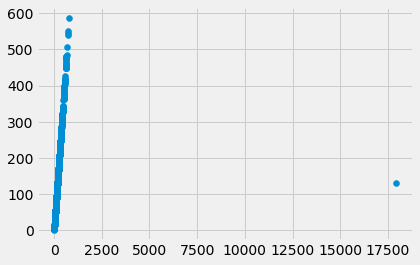

In [500]:
# No suprise here, perfect correlation sicne the variable represent the same thing
plt.scatter(df_copy['Motor KM'], df_copy['Motor kW'])

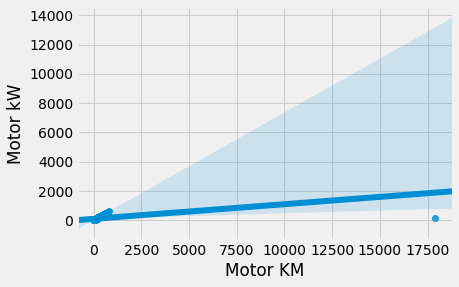

In [501]:
sns.regplot(df_copy['Motor KM'], df_copy['Motor kW'], fit_reg=True, ci=95) 

0.49930573018163665

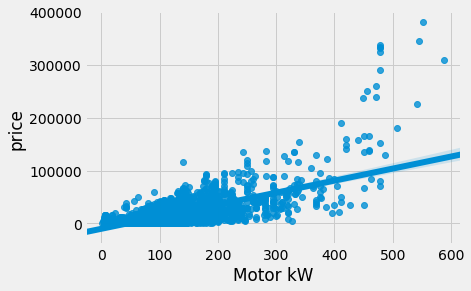

In [502]:
sns.regplot(df_copy['Motor kW'], df_copy['price'], fit_reg=True, ci=95) 
corr, _ = scipy.stats.spearmanr(df_copy['Motor kW'], df_copy['price'])
corr

-0.553585827243363

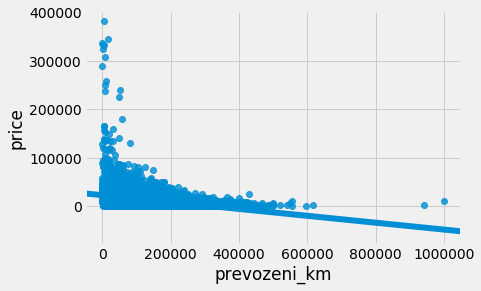

In [503]:
sns.regplot(df_copy['prevozeni_km'], df_copy['price'], fit_reg=True, ci=95) 
corr, _ = scipy.stats.spearmanr(df_copy['prevozeni_km'], df_copy['price'], nan_policy='omit')
corr

In [504]:
corr, _ = scipy.stats.spearmanr(df_copy['Motor KM'], df_copy['price'])

In [505]:
df_copy['Notranjost'].value_counts()#.plot(kind='barh')

/                          3181
emno siva / blag           2358
črna / blag               1843
črna / usnje              1035
/ blag                      683
                           ... 
zelena / usnje                1
zelena / velu                 1
vetlo siva / napa usnje       1
bela / velu                   1
deča / napa usnje            1
Name: Notranjost, Length: 85, dtype: int64

In [506]:
df_copy['Notranjost'][17]

'emno siva / blag'